In [16]:
## STANDARD IMPORTS
import os
import time
import h5py
import numpy as np
import pandas as pd
import json
## PLOTTING
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, colors
import matplotlib.patches as mpatches
from matplotlib.colors import BoundaryNorm

In [17]:
# plot channel status from csv file
df = pd.read_csv('../channel_status/channel_status.csv', header=None)
channel_status = df.to_numpy()

In [18]:
def plot_all_masks_single(masks, channel_status, title):
  n_masks, n_adc, n_channel = masks.shape
  combined = np.full((n_adc, n_channel), np.nan)  # set all to nan for transparency

  # For each mask, set the value to its index where mask is nonzero
  for idx in range(n_masks):
    combined[masks[idx] != 0] = idx

  # use custom color map
  cmap = cm.get_cmap('viridis', n_masks)
  cmap.set_bad(color='w')
  plt.figure(figsize=(20, 4))
  im = plt.imshow(combined, cmap=cmap, aspect='auto')
  plt.colorbar(im, label='Mask Index')
  plt.xlabel('Channel')
  plt.ylabel('ADC')
  plt.xticks(np.arange(0, 64, 1) - 0.5, labels=np.arange(0, 64, 1))
  plt.yticks(np.arange(0, 8, 1) - 0.5, labels=np.arange(0, 8, 1))
  plt.grid(which='both', linewidth=0.5, alpha=0.5, color='white')

  # Add numbers to the center of each bin
  for i in range(n_adc):
    for j in range(n_channel):
      if not np.isnan(combined[i, j]):
        plt.text(j, i, int(combined[i, j]), ha='center', va='center', color='r', fontsize=8)

  # Add markers for channel_status == 1 and channel_status == 2
  '''
  y, x = np.where(channel_status == 1)
  plt.scatter(x, y, color='red', marker='o', label='Dead', edgecolors='w')
  y, x = np.where(channel_status == 2)
  plt.scatter(x, y, color='w', marker='o', label='Baseline', edgecolors='k')
  plt.legend(loc='upper right')
  '''
  plt.title(title)
  plt.tight_layout()
  plt.show()

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


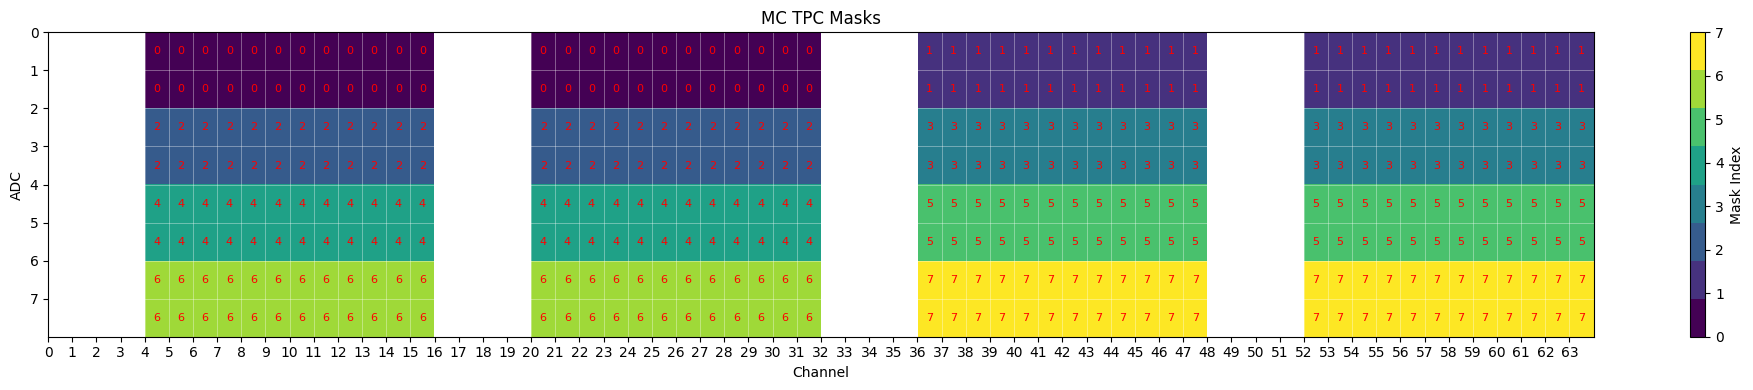

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


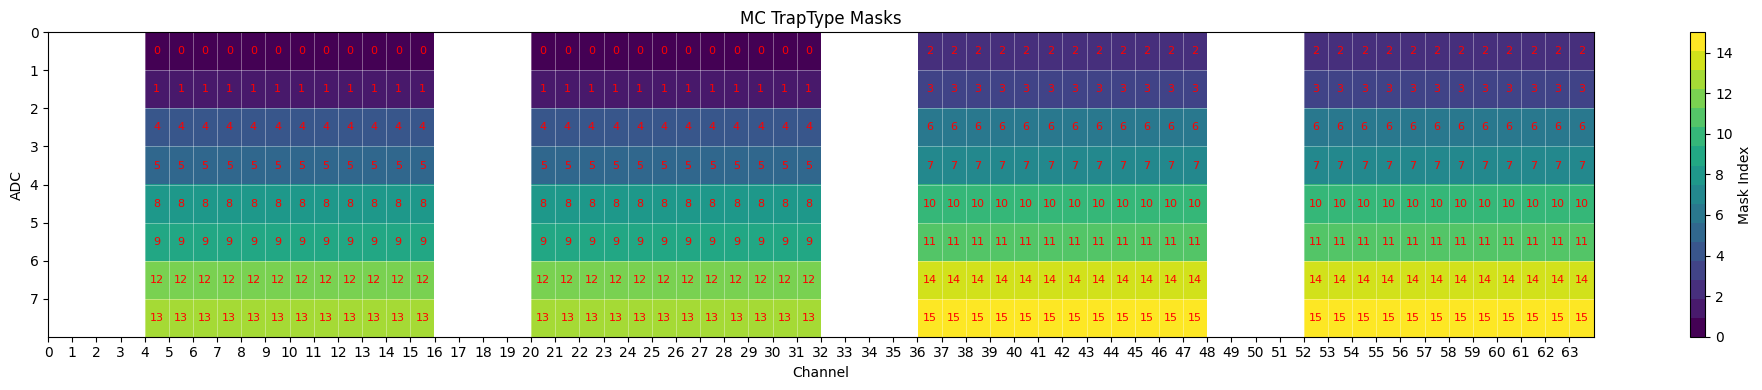

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


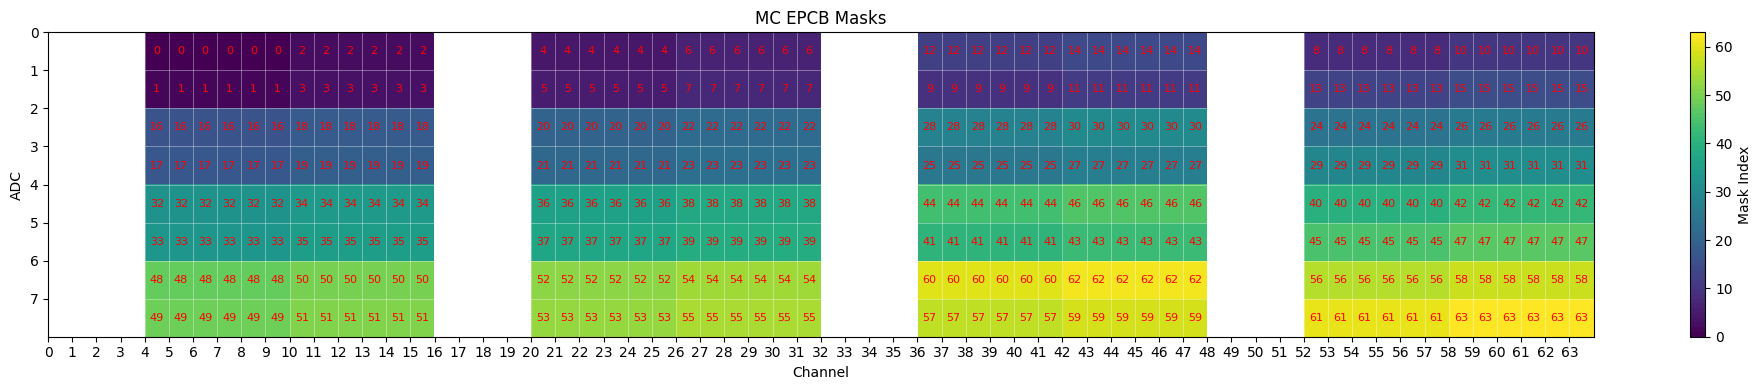

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


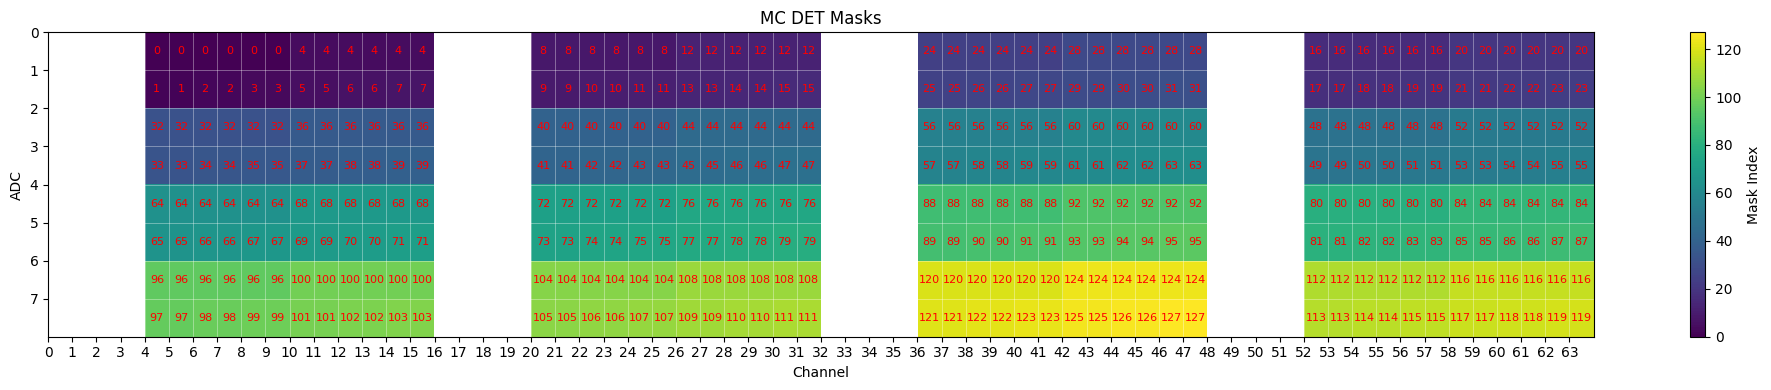

In [19]:
# load masks file
masks = np.load('MC_TPC.npy')
plot_all_masks_single(masks, channel_status, "MC TPC Masks")

masks = np.load('MC_TrapType.npy')
plot_all_masks_single(masks, channel_status, "MC TrapType Masks")

masks = np.load('MC_EPCB.npy')
plot_all_masks_single(masks, channel_status, "MC EPCB Masks")

masks = np.load('MC_DET.npy')
plot_all_masks_single(masks, channel_status, "MC DET Masks")

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


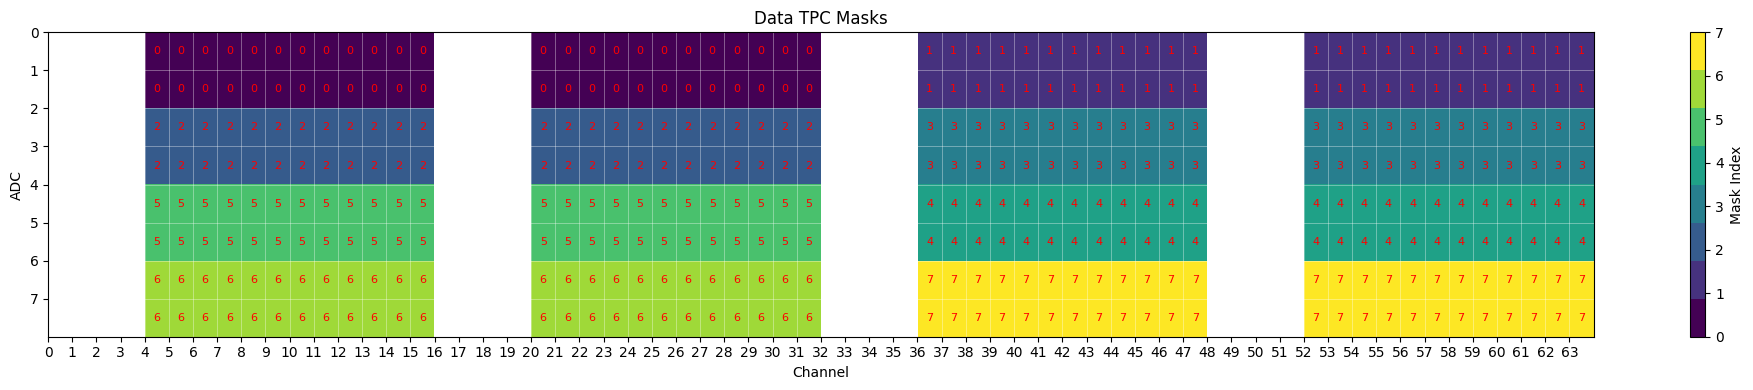

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


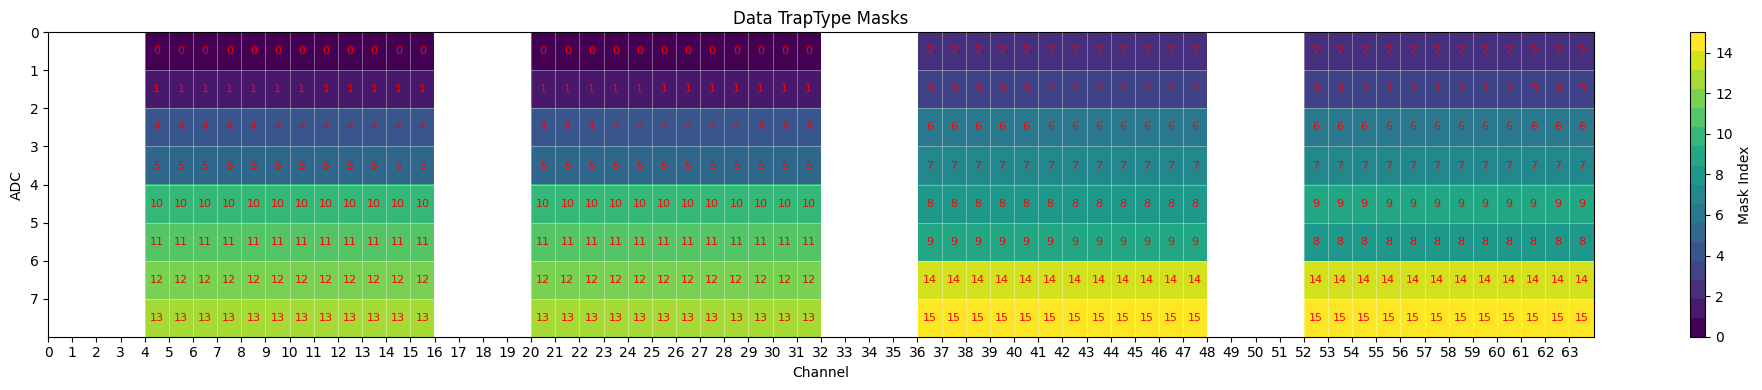

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


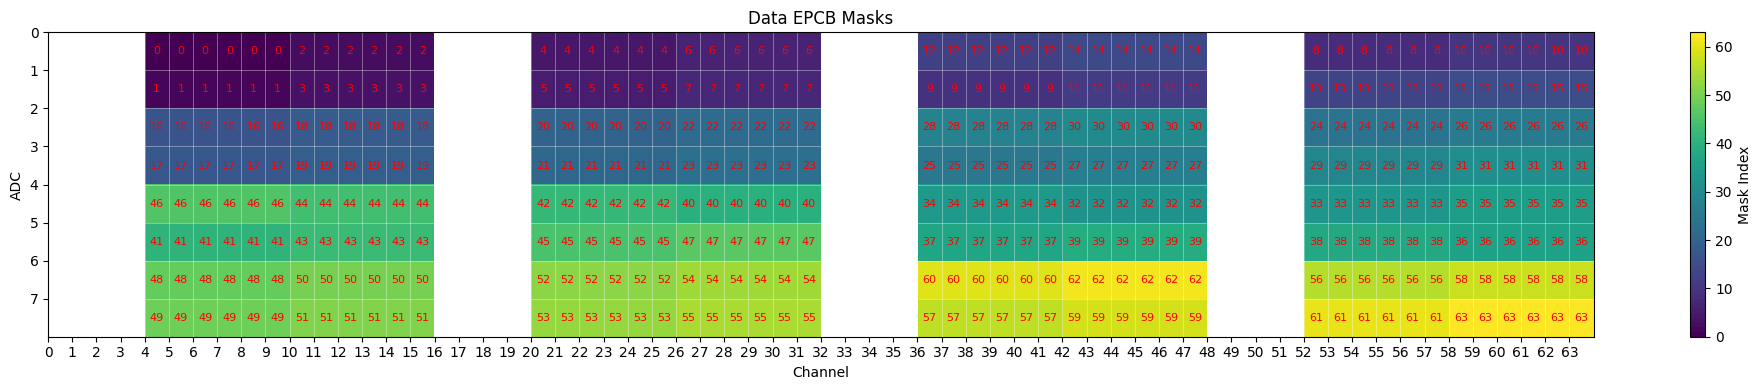

/tmp/ipykernel_2357562/4201340575.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_masks)


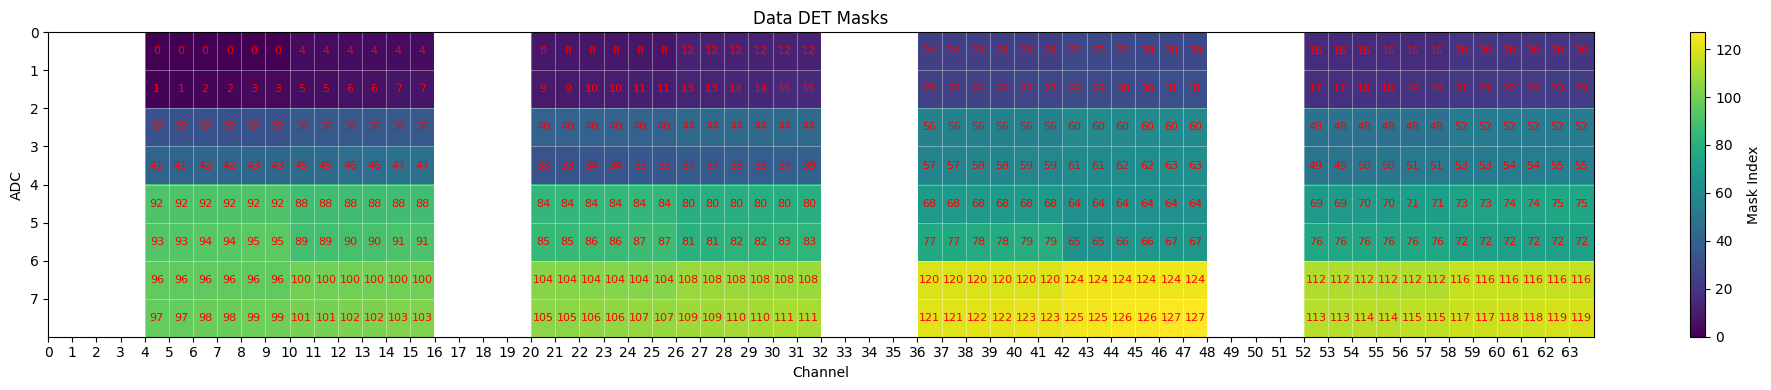

In [20]:
# load masks file
masks = np.load('data_TPC.npy')
plot_all_masks_single(masks, channel_status, "Data TPC Masks")

masks = np.load('data_TrapType.npy')
plot_all_masks_single(masks, channel_status, "Data TrapType Masks")

masks = np.load('data_EPCB.npy')
plot_all_masks_single(masks, channel_status, "Data EPCB Masks")

masks = np.load('data_DET.npy')
plot_all_masks_single(masks, channel_status, "Data DET Masks")